# 🟦 신경망 모델구조와 학습

# import

In [1]:
import torch
from torch import nn
from torch.utils.data import TensorDataset  # 데이터셋 구성
from torch.utils.data import DataLoader

# 데이터 준비

In [3]:
# 입력 x에 2를 더한 값이 y가 되는 데이터셋을 준비해봅니다
# 👉 학습하고자 하는 함수: y = x + 2

x_train = torch.Tensor([1, 2, 3, 4, 5, 6, 7]).view(-1,1)  # 2차원 입력으로 만들어 준다
y_train = torch.Tensor([3, 4, 5, 6, 7, 8, 9]).view(-1,1)

print(x_train)
print(y_train)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.]])
tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


In [4]:
dataset = TensorDataset(x_train, y_train)

In [5]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

In [7]:
len(dataloader)   # batch 의 개수

# batch_size=3,  입력데이터 7개
# 3, 3, 1  <- 3개의 batch

3

# 신경망 모델 구축
- 파이토치 신경망 모델은 **nn.Module** 을 상속받아 클래스를 생성하여 정의하는 것이 일반적
- 클래스의 **`__init__`** 생성자함수에서 신경망 모델을 구성하는 다양한 계층(layer)들을 정의하고, **forward()** 함수에서 신경망에 데이터를 어떻게 전달할지, 즉 피드포워드(feed forward)를 수행하고 결과를 리턴합니다.




## torch.nn.Sequential

여러 개의 nn.Module(레이어, 연산)을 순차적으로 묶어서 하나의 모델처럼 사용할 수 있게 해주는 컨테이너

https://docs.pytorch.org/docs/stable/generated/torch.nn.Sequential.html#sequential

```python
class torch.nn.Sequential(*args: Module)**굵은 텍스트**
class torch.nn.Sequential(arg: OrderedDict[str, Module])
```
## torch.nn.Linear
신경망에서 완전연결층(Fully Connected Layer, Dense Layer)

https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html#linear

```python
class torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

# 모델 생성 nn.Module

In [8]:
class MyNeuralNetwork(nn.Module):

  # 생성자에선, 신경망 모델을 구성하는 layer 들 정의
  def __init__(self):
    super().__init__()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(in_features=1, out_features=1),
        # 입력 차원 1 → 출력 차원 1인 선형 변환
        # 즉, y = w*x + b 형태의 단일 선형 모델
    )

  # ↓ forward() 는 모델이 입력을 받았을때 피드포워드를 수행하고 결괏값 리턴하는 함수
  def forward(self, x):
    logits = self.linear_relu_stack(x)  # 객체호출.  __call__
    return logits

In [9]:
model = MyNeuralNetwork()

# 손실함수 & 옵티마이저

In [10]:
loss_function = nn.MSELoss()
# 손실 함수: 평균제곱오차 (MSE) (회귀 문제에서 사용)
# → 예측값과 정답의 차이를 제곱해서 평균

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
# 옵티마이저: SGD(확률적 경사하강법)
# → 학습률 lr=0.01로 파라미터를 업데이트



# 학습 - DataLoader 사용안함

In [11]:
nums_epoch = 2000

# 매 epoch마다 x_train → 모델 → 예측 → 손실 계산 → 경사 하강법으로 업데이트
for epoch in range(nums_epoch + 1):

  # 모델 예측
  prediction = model(x_train)
  # 손실 계산
  loss = loss_function(prediction, y_train)

  optimizer.zero_grad()  # 기존의 기울기 초기화
  loss.backward()   # 역전파로 기울기 계산.
  optimizer.step()   # weight 업데이트

  # 100 epoch 마다 현재 손실 출력
  if epoch % 100 == 0:
    print(f'Epoch = {epoch}  current loss = {loss.item()}')


Epoch = 0  current loss = 6.9325947761535645
Epoch = 100  current loss = 0.5336094498634338
Epoch = 200  current loss = 0.2469630092382431
Epoch = 300  current loss = 0.11429821699857712
Epoch = 400  current loss = 0.05289914458990097
Epoch = 500  current loss = 0.02448260597884655
Epoch = 600  current loss = 0.011330918408930302
Epoch = 700  current loss = 0.005244095344096422
Epoch = 800  current loss = 0.0024270503781735897
Epoch = 900  current loss = 0.0011232862016186118
Epoch = 1000  current loss = 0.0005198715371079743
Epoch = 1100  current loss = 0.00024060312716756016
Epoch = 1200  current loss = 0.0001113508697017096
Epoch = 1300  current loss = 5.153270103619434e-05
Epoch = 1400  current loss = 2.3850128854974173e-05
Epoch = 1500  current loss = 1.1036660907848272e-05
Epoch = 1600  current loss = 5.10765312355943e-06
Epoch = 1700  current loss = 2.363931344007142e-06
Epoch = 1800  current loss = 1.0944943369395332e-06
Epoch = 1900  current loss = 5.065745654064813e-07
Epoch 

In [ ]:
# y = wx + b

#  y = x + 2  형태에 가깝게 학습될거다.
#  학습 초기에는 w, b 값은 랜덤. 점점 w -> 1,  b -> 2 로 수렴하게 될거다.

# 학습 - DataLoader 사용
- batch 사용

In [12]:
model = MyNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [13]:
num_epoch = 2000

for epoch in range(num_epoch + 1):

  # 매 epoch 마다 batch 순환
  for idx, batch_data in enumerate(dataloader):
    x_train_batch, y_train_batch = batch_data  # batch_size 만큼의 입력데이터, 타켓데이터

    # 모델 예측
    output_batch = model(x_train_batch)  # batch_size 크기 만큼의 예측값 리턴

    print(f'epoch={epoch} batch_idx={idx+1}',
          len(x_train_batch), len(y_train_batch), len(output_batch))

    # 손실 계산
    loss = loss_function(output_batch, y_train_batch)

    optimizer.zero_grad()  # 기존의 기울기 초기화
    loss.backward()   # 역전파로 기울기 계산
    optimizer.step()   # weight 업데이트

  # 100 epoch 마다 현재 손실 출력
  if epoch % 100 == 0:
    print(f'Epoch = {epoch}  current loss = {loss.item()}')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
epoch=340 batch_idx=1 3 3 3
epoch=340 batch_idx=2 3 3 3
epoch=340 batch_idx=3 1 1 1
epoch=341 batch_idx=1 3 3 3
epoch=341 batch_idx=2 3 3 3
epoch=341 batch_idx=3 1 1 1
epoch=342 batch_idx=1 3 3 3
epoch=342 batch_idx=2 3 3 3
epoch=342 batch_idx=3 1 1 1
epoch=343 batch_idx=1 3 3 3
epoch=343 batch_idx=2 3 3 3
epoch=343 batch_idx=3 1 1 1
epoch=344 batch_idx=1 3 3 3
epoch=344 batch_idx=2 3 3 3
epoch=344 batch_idx=3 1 1 1
epoch=345 batch_idx=1 3 3 3
epoch=345 batch_idx=2 3 3 3
epoch=345 batch_idx=3 1 1 1
epoch=346 batch_idx=1 3 3 3
epoch=346 batch_idx=2 3 3 3
epoch=346 batch_idx=3 1 1 1
epoch=347 batch_idx=1 3 3 3
epoch=347 batch_idx=2 3 3 3
epoch=347 batch_idx=3 1 1 1
epoch=348 batch_idx=1 3 3 3
epoch=348 batch_idx=2 3 3 3
epoch=348 batch_idx=3 1 1 1
epoch=349 batch_idx=1 3 3 3
epoch=349 batch_idx=2 3 3 3
epoch=349 batch_idx=3 1 1 1
epoch=350 batch_idx=1 3 3 3
epoch=350 batch_idx=2 3 3 3
epoch=350 batch_idx=3 1 1 1
epoch=351 batch_idx=1 3 3 3
epoch=351 ba

# 테스트 데이터 예측

In [14]:
# 테스트 데이터 준비
#  모델 입력을 위해 2차원으로 준비
x_test = torch.Tensor([-3.1, 3.0, 1.2, -2.5]).view(4, 1)

In [15]:
"""
y = x + 2

-3.1 -> -1.1
3.0 -> 5.0
1.2 -> 3.2
-2.5 -> -0.5

예측값은 위 값들에 매우 근접하게 나올것이다.

"""

pred = model(x_test)

print(pred)


tensor([[-1.1000],
        [ 5.0000],
        [ 3.2000],
        [-0.5000]], grad_fn=<AddmmBackward0>)


# 🟦 다중 선형회귀
MultiVariableLinearRegression

# import

In [16]:
import os
import numpy as np
import pandas as pd
import torch
from torch import nn

import matplotlib.pyplot as plt

# 데이터 준비

In [17]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

In [18]:
loaded_data = np.loadtxt(os.path.join(base_path, 'LEC06_TrainData.csv'), delimiter=',')

loaded_data.shape

(15, 4)

In [19]:
loaded_data

# 이 데이터는 아래의 공식으로 만들어 놓은 데이터다
# y = 2 * x1 − 3 * x2 + 2 * x3

array([[ 1.,  2.,  0., -4.],
       [ 5.,  4.,  3.,  4.],
       [ 1.,  2., -1., -6.],
       [ 3.,  1.,  0.,  3.],
       [ 2.,  4.,  2., -4.],
       [ 4.,  1.,  2.,  9.],
       [-1.,  3.,  2., -7.],
       [ 4.,  3.,  3.,  5.],
       [ 0.,  2.,  6.,  6.],
       [ 2.,  2.,  1.,  0.],
       [ 1., -2., -2.,  4.],
       [ 0.,  1.,  3.,  3.],
       [ 1.,  1.,  3.,  5.],
       [ 0.,  1.,  4.,  5.],
       [ 2.,  3.,  3.,  1.]])

In [20]:
# x_train_np : 모든 행에서 마지막 열을 제외한 부분 → 입력 데이터.
# y_train_np : 마지막 열만 추출 → 타겟값.

x_train_np = loaded_data[:, 0:-1]
y_train_np = loaded_data[:, [-1]]

print(x_train_np.shape, y_train_np.shape)

(15, 3) (15, 1)


In [21]:
# 샘플 출력
print(loaded_data[:3])
print('-' * 20)
print(x_train_np[:3])
print('-' * 20)
print(y_train_np[:3])

[[ 1.  2.  0. -4.]
 [ 5.  4.  3.  4.]
 [ 1.  2. -1. -6.]]
--------------------
[[ 1.  2.  0.]
 [ 5.  4.  3.]
 [ 1.  2. -1.]]
--------------------
[[-4.]
 [ 4.]
 [-6.]]


## Tensor 준비

In [22]:
# numpy 배열 -> Tensor 변환.
x_train = torch.Tensor(x_train_np)
y_train = torch.Tensor(y_train_np)

# 모델정의

In [23]:
class MyLinearRegressionModel(nn.Module):

  def __init__(self, input_nodes):
    super().__init__()
    self.linear_stack = nn.Sequential(
        # 입력 input_nodes개의 특징을 받아 출력 1개(스칼라) 로 변환.
        # 입력이 [x1, x2, x3]라면 w1*x1 + w2*x2 + w3*x3 + b 형태의 예측값을 반환.
        nn.Linear(in_features=input_nodes, out_features=1),
    )

  def forward(self, x):
    logits = self.linear_stack(x)
    return logits

In [24]:
model = MyLinearRegressionModel(3)

# 입력 특징 개수 3 -> Dataset 형태틑 (x1, x2, x3 -> y) 형태

# 모델 파라미터 확인

### 1) `model.named_children()`

* **리턴값:** `(name, module)` 쌍들의 iterator.
* **특징:** *직접적인(한 단계) 자식 모듈들만* 리턴. (예: `self.conv1`, `self.bn1`, `self.fc` 처럼 `__init__`에서 할당한 모듈들)
* **주의:** 하위 하위(sub-sub) 모듈은 포함하지 않습니다. 재귀적으로 모든 모듈을 보고 싶으면 `model.named_modules()` 를 사용.

In [25]:
children = model.named_children()
children

<generator object Module.named_children at 0x7984fe4f3300>

In [26]:
# 첫번째 것만 확인
name, child = next(iter(children))
print(name)
print(child)

linear_stack
Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
)


In [27]:
type(child)

torch.nn.modules.container.Sequential

**torch.nn.Module.parameters()**

https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters

torch.nn.Parameter들의 iterator를 리턴. recurse=True(디폴트) 이므로 그 자식 모듈과 그 하위(재귀적인) 모든 서브모듈들의 파라미터를 순회함

```python
torch.nn.Module.parameters(recurse=True)
```




**torch.nn.Parameter**

https://docs.pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

```python
class torch.nn.parameter.Parameter(
  data=None,
  requires_grad=True)
```

  * 주요 속성들
    * `param.shape` / `param.numel()` — 크기(개수) 확인
    * `param.dtype` — 자료형 (예: `torch.float32`)
    * `param.requires_grad` — 학습(역전파)에서 업데이트되는지 여부
    * `param.grad` — 최근 backward 결과로 채워진 gradient (backward 전엔 `None`)

In [28]:
params = child.parameters()
params   # Parameter 들의 iterable

<generator object Module.parameters at 0x79851236b680>

In [29]:
# 첫번째 Parameter 객체
param = next(iter(params))

print(type(param))

param

<class 'torch.nn.parameter.Parameter'>


Parameter containing:
tensor([[ 0.0610,  0.1702, -0.4636]], requires_grad=True)

In [30]:
param.shape

torch.Size([1, 3])

In [31]:
param.numel()

3

In [32]:
param.dtype

torch.float32

In [33]:
param.requires_grad

True

## parameter (w, b) Tensor 출력

In [34]:
for name, child in model.named_children():
  for param in child.parameters():
    print(name, '\n', param)
    print()

linear_stack 
 Parameter containing:
tensor([[ 0.0610,  0.1702, -0.4636]], requires_grad=True)

linear_stack 
 Parameter containing:
tensor([-0.3264], requires_grad=True)



In [ ]:
"""
linear_stack
 Parameter containing:
tensor([[-0.4111,  0.4718,  0.1631]], requires_grad=True)
        우리목표는 ↑ 위 weights 값들이 (2, -3, 2) 로 학습되는 것이다

linear_stack
 Parameter containing:
tensor([-0.4632], requires_grad=True)
  우리목표는 ↑ 위 bias 값이 0 으로 로 학습되는 것이다
"""
None

## parameter 메타정보만 출력

In [35]:
# 위의 모델에서는 파라미터 개수가 적기 때문에 출력해볼수 있으나,
# 일반적인 모델에선 Tensor 의 크기가 매우 크기 때문에 출력이 매~우 길어지고 느려집니다.
# 보통은 값 전체를 출력하는 것은 비효율적이고 보기 어렵습니다.
# ↓↓ 대신! 아래처럼 메타정보를 출력하는 편이 유용.

In [37]:
for child_name, child in model.named_children():
  total = 0
  print('🟨',child_name)
  for p in child.parameters():
    print(' ', p.shape, p.numel(), 'requires_grad=', p.requires_grad)
    total += p.numel()

  print(' ', 'total params:', total, '\n')


🟨 linear_stack
  torch.Size([1, 3]) 3 requires_grad= True
  torch.Size([1]) 1 requires_grad= True
  total params: 4 



## parameter 이름까지 출력
`named_children()`로 얻은 `child`의 `named_parameters()`는 그 **child 내부에서의** 파라미터 이름을 줍니다. 전체 경로(full name)를 만들면 더 직관적입니다:

In [38]:
for child_name, child in model.named_children():
  for param_name, param in child.named_parameters():
    print(f'{child_name}.{param_name}', param.shape)

linear_stack.0.weight torch.Size([1, 3])
linear_stack.0.bias torch.Size([1])


## 전체 parameter 들의 name 과 shape 보기

In [39]:
for name, param in model.named_parameters():
  print(name, param.shape)

linear_stack.0.weight torch.Size([1, 3])
linear_stack.0.bias torch.Size([1])


In [40]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.0610,  0.1702, -0.4636]], requires_grad=True)
Parameter containing:
tensor([-0.3264], requires_grad=True)


### 모듈/파라미터 관련 자주 쓰이는 함수들 비교 (요약)

* `model.children()` / `model.named_children()` : **직접 자식 모듈**만.
* `model.modules()` / `model.named_modules()` : 재귀적으로 **자기 자신 포함** 모든 모듈.
* `module.parameters(recurse=True)` : 그 모듈과 하위 모듈들의 파라미터 (기본값 `True`).
* `module.named_parameters(recurse=False)` : 그 모듈에 **직접 등록된** 파라미터만(하위 모듈 제외).
* `model.state_dict()` : (파라미터 + 버퍼)의 이름 → 텐서 맵 (저장/로딩에 유용).

# 손실함수 , 옵티마이저

In [41]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# 학습

In [42]:
# 총 2000 epoch 학습
# epoch 진행에 따 loss 값의 변화 시각화
# 매 100 epoch 마다 현재 loss 값 출력

In [43]:
loss_list = []
num_epoch = 2000

for epoch in range(num_epoch + 1):

  # 예측값 계산
  # model 에 데이터를 전달하면 model 클래스의 forward() 함수가 자동으로 호출된
  # forward() 함수를 우리가 직접 호출하면 안됨!
  prediction = model(x_train)
  loss = loss_function(prediction, y_train)

  loss_list.append(loss.item())  # 매 epoch 마다 loss 값 저장. -> loss curve 시각화

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'epoch = {epoch}  current loss = {loss.item()}')


epoch = 0  current loss = 32.0444450378418
epoch = 100  current loss = 0.18650294840335846
epoch = 200  current loss = 0.0035242214798927307
epoch = 300  current loss = 0.0007242463761940598
epoch = 400  current loss = 0.00024104738258756697
epoch = 500  current loss = 8.141646685544401e-05
epoch = 600  current loss = 2.7508853236213326e-05
epoch = 700  current loss = 9.295707968703937e-06
epoch = 800  current loss = 3.1411379950441187e-06
epoch = 900  current loss = 1.061849616235122e-06
epoch = 1000  current loss = 3.595581858917285e-07
epoch = 1100  current loss = 1.2169060426003853e-07
epoch = 1200  current loss = 4.134630415819629e-08
epoch = 1300  current loss = 1.4029167161311307e-08
epoch = 1400  current loss = 4.723936353201452e-09
epoch = 1500  current loss = 1.6519163814621152e-09
epoch = 1600  current loss = 6.127920948451049e-10
epoch = 1700  current loss = 2.435803225786515e-10
epoch = 1800  current loss = 1.1478930306285662e-10
epoch = 1900  current loss = 5.630819074897

## 학습후 파라미터 확인

In [44]:
for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

linear_stack Parameter containing:
tensor([[ 2.0000, -3.0000,  2.0000]], requires_grad=True)
linear_stack Parameter containing:
tensor([-1.0622e-05], requires_grad=True)


## 테스트 데이터 예측

In [45]:
# 테스트 입력 데이터
x_test = torch.Tensor([[5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2]])

x_test

tensor([[ 5.,  5.,  0.],
        [ 2.,  3.,  1.],
        [-1.,  0., -1.],
        [10.,  5.,  2.],
        [ 4., -1., -2.]])

In [46]:
# 테스트 y값 (label) 도 직접 준비
#  y = 2 * x1 - 2 * x2 + 2 * x3
label = [2 * data[0] - 3 * data[1] + 2 * data[2]   for data in x_test ]
label

[tensor(-5.), tensor(-3.), tensor(-4.), tensor(9.), tensor(7.)]

In [47]:
# 학습된 모델로 예측
pred = model(x_test)

In [48]:
print(pred)  # 예측값

tensor([[-5.0000],
        [-3.0000],
        [-4.0000],
        [ 9.0000],
        [ 7.0000]], grad_fn=<AddmmBackward0>)


In [49]:
print(label)

[tensor(-5.), tensor(-3.), tensor(-4.), tensor(9.), tensor(7.)]


# 학습곡선 시각화
loss curve

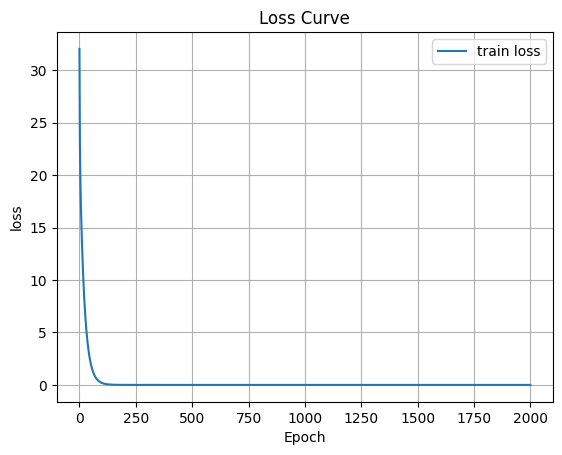

In [50]:
plt.title('Loss Curve')
plt.xlabel("Epoch")
plt.ylabel('loss')

plt.grid()

plt.plot(loss_list, label='train loss')
plt.legend(loc='best')

plt.show()

# ⚙️ 전체 동작 요약

1. **데이터 로드**: CSV에서 `(x1, x2, x3 → y)` 형태의 데이터셋 준비.
2. **모델 정의**: 3개의 입력 → 1개의 출력 (선형 회귀).
3. **손실 및 옵티마이저**: MSE + SGD.
4. **학습 루프**: 순전파 → 손실 계산 → 역전파 → 파라미터 갱신.
5. **결과 확인**: 학습된 weight, bias 확인 및 테스트셋으로 검증.
6. **시각화**: 손실 감소 추세 그래프 출력.

즉, 이 코드는 **PyTorch로 구현한 다중 선형 회귀 모델**이며,
데이터셋에 숨겨진 규칙 `y = 2x1 - 3x2 + 2x3`을 학습하여 예측할 수 있게 만듭니다. 🚀